In [1]:
] activate .

  Activating project at `~/Projects/HTM/Notebooks`


In [2]:
using Plots

In [3]:
include(string(@__DIR__, "/../Scripts/jupic.jl"))

segments_for_column

In [4]:
num_cols = 512
encoding_size = 16

seq1 = "ABC"
seq2 = "ZBD"

unique_letters = Set(seq1 * seq2)
encodings = Dict{Char, Array{Int, 1}}()
for ul in unique_letters
    encodings[ul] = randperm(num_cols)[1:encoding_size]
end

In [5]:
cells_per_col = encoding_size
tm = TempMem(
    num_cols, 
    cells_per_col,
    synapse_sample_size = 32,
    initial_segments_per_cell = 0
)

TempMem
	512 Columns

In [6]:
epochs = 100
for i in 1:epochs
    seq = rand([seq1, seq2])
    for char in seq
        update!(tm, encodings[char])
    end
end

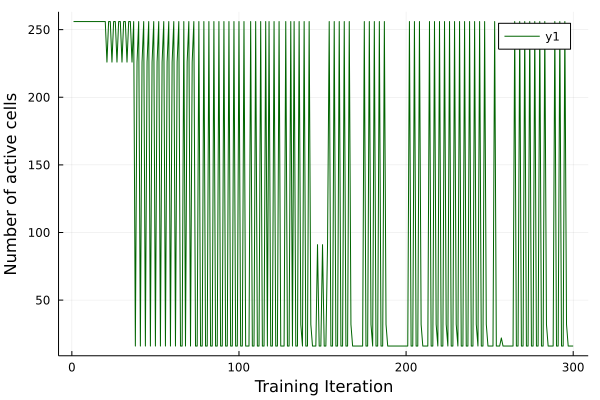

In [7]:
timesteps = 1:(epochs * 3)
num_active_cells = [length(tm.active_cells[t]) for t in 1:tm.t][timesteps]
plot(timesteps, num_active_cells, color="darkgreen")
xlabel!("Training Iteration")
ylabel!("Number of active cells")

In [8]:
predicted_cells(tm, t) = [findfirst([seg.cell == c for c in tm.cells])
    for seg in tm.active_segments[t]
]
predicted_columns(tm) = [
    cell ÷ tm.ps.cells_per_col + 1 for cell in predicted_cells(tm, tm.t)
]

predicted_columns (generic function with 1 method)

### Sequence 1 "B" Representation

In [9]:
update!(tm, encodings['A'])

seq1_B_prediction = predicted_columns(tm)
seq1_B_pred_cells = predicted_cells(tm , tm.t)
for ul in unique_letters
    match = intersect(seq1_B_prediction, encodings[ul])
    println("Prediction matches $match column(s) from the encoding for $ul")
end


Prediction matches Int64[] column(s) from the encoding for C
Prediction matches Int64[] column(s) from the encoding for D
Prediction matches Int64[] column(s) from the encoding for A
Prediction matches Int64[] column(s) from the encoding for Z
Prediction matches [473, 117, 388, 432, 84, 270, 55, 335, 435, 113, 73, 209, 263, 6, 17] column(s) from the encoding for B


### Sequence 1 Prediction based on "B" representation

In [10]:
update!(tm, encodings['B'])
seq1_C_prediction = predicted_columns(tm)
for ul in unique_letters
    match = intersect(seq1_C_prediction, encodings[ul])
    println("Prediction matches the following column(s): $match from the encoding for $ul")
end
update!(tm, encodings['C'])

Prediction matches the following column(s): [1, 5, 266, 312, 503, 349, 297, 500, 24, 225, 191, 258, 212, 300, 60] from the encoding for C
Prediction matches the following column(s): [212] from the encoding for D
Prediction matches the following column(s): Int64[] from the encoding for A
Prediction matches the following column(s): Int64[] from the encoding for Z
Prediction matches the following column(s): Int64[] from the encoding for B


### 

In [11]:
update!(tm, encodings['Z'])
seq2_B_prediction = predicted_columns(tm)
seq2_B_pred_cells = predicted_cells(tm , tm.t)

for ul in unique_letters
    match = intersect(seq2_B_prediction, encodings[ul])
    println("Prediction matches the following column(s): $match from the encoding for $ul")
end


Prediction matches the following column(s): Int64[] from the encoding for C
Prediction matches the following column(s): Int64[] from the encoding for D
Prediction matches the following column(s): Int64[] from the encoding for A
Prediction matches the following column(s): Int64[] from the encoding for Z
Prediction matches the following column(s): [209, 263, 84, 388, 432, 6, 113, 117, 435, 73, 244, 17, 55, 473, 270, 335] from the encoding for B


In [12]:
update!(tm, encodings['B'])
seq2_D_prediction = predicted_columns(tm)
for ul in unique_letters
    match = intersect(seq2_D_prediction, encodings[ul])
    println("Prediction matches the following column(s): $match from the encoding for $ul")
end
update!(tm, encodings['D'])

Prediction matches the following column(s): [212] from the encoding for C
Prediction matches the following column(s): [341, 447, 93, 460, 15, 402, 193, 157, 384, 342, 449, 497, 493, 78, 212] from the encoding for D
Prediction matches the following column(s): [447] from the encoding for A
Prediction matches the following column(s): Int64[] from the encoding for Z
Prediction matches the following column(s): Int64[] from the encoding for B


### Overlap in predicted *Columns* for "B"

In [13]:
B_pred_intersect = intersect(seq1_B_prediction, seq2_B_prediction)
println("Length of sequence 1 predicted columns: $(length(seq1_B_prediction))")
println("Length of sequence 2 predicted columns: $(length(seq2_B_prediction))")
println("Intersection of the two sets of columns: $(B_pred_intersect) length = $(length(B_pred_intersect))")

Length of sequence 1 predicted columns: 16
Length of sequence 2 predicted columns: 32
Intersection of the two sets of columns: [473, 117, 388, 432, 84, 270, 55, 335, 435, 113, 73, 209, 263, 6, 17] length = 15


### Overlap in *cells in predicted state* for "B"

In [14]:
B_pred_cell_intersect = intersect(seq1_B_pred_cells, seq2_B_pred_cells)
println("Length of sequence 1 predicted cells: $(length(seq1_B_pred_cells))")
println("Length of sequence 2 predicted cells: $(length(seq2_B_pred_cells))")
println("Intersection of the two sets of cells: $(B_pred_cell_intersect) length = $(length(B_pred_cell_intersect))")

Length of sequence 1 predicted cells: 16
Length of sequence 2 predicted cells: 32
Intersection of the two sets of cells: Int64[] length = 0


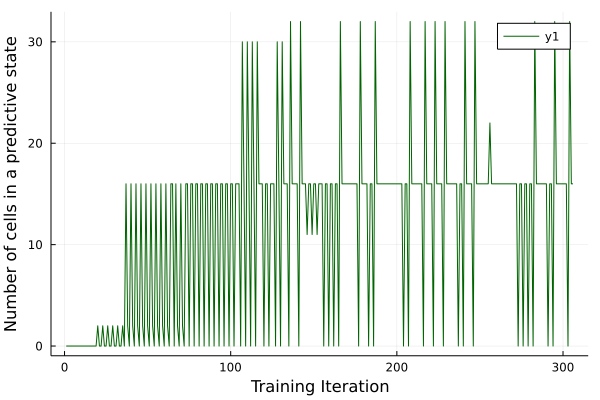

In [15]:
number_predicted_cells = [length(predicted_cells(tm, t)) for t in 1:tm.t]
plot(number_predicted_cells, color="darkgreen")
xlabel!("Training Iteration")
ylabel!("Number of cells in a predictive state")